In [127]:
import pandas as pd

## Freqency Encoding

In [128]:
# FRQ_ENCODE_MAP = {}
# state_names = []
# for col_name in df.columns:
#     if len(col_name) == 2 and col_name != 'id': # Get all state columns name
#         FRQ_ENCODE_MAP[col_name] = df[col_name].sum()
# print(FRQ_ENCODE_MAP)
# states_column = []
# for _, row in df.iterrows():
#     for state_name in FRQ_ENCODE_MAP.keys():
#         if row[state_name] == 1:
#             states_column.append( FRQ_ENCODE_MAP[state_name] )

# df = df.drop(FRQ_ENCODE_MAP.keys(), axis=1)
# df.insert(1, "states", states_column)

## Target Encoding

In [129]:
df = pd.read_csv("covid.train.csv")
OUTPUT_CSV = "covid.train.new.csv"

TAR_ENCODE_MAP = {}
for col_name in df.columns:
    if len(col_name) == 2 and col_name != 'id': # Get all state columns name
        df_state = df.groupby(col_name).get_group(1)
        TAR_ENCODE_MAP[col_name] = df_state["tested_positive.4"].sum() / df_state.shape[0]
print(TAR_ENCODE_MAP)

{'AL': 15.005909244827581, 'AK': 14.546685595161293, 'AZ': 8.951095406172838, 'AR': 18.62185540657895, 'CA': 5.947151641573034, 'CO': 6.9489213564516135, 'CT': 3.2271791383561643, 'FL': 7.808366912903226, 'GA': 7.367021382089553, 'ID': 20.936333883870965, 'IL': 6.059396527848101, 'IN': 9.449048365934065, 'IA': 17.682927806410255, 'KS': 15.222484427536232, 'KY': 6.843044496610169, 'LA': 11.28748624864865, 'MD': 4.19443413, 'MA': 3.295504172151899, 'MI': 6.079953656976743, 'MN': 5.874242498863636, 'MS': 22.153107878666667, 'MO': 14.043850516, 'NE': 19.479239305128207, 'NV': 13.58817926666667, 'NJ': 3.682304578082192, 'NM': 7.516568060294118, 'NY': 3.5886610794871796, 'NC': 7.59798967580645, 'OH': 6.584591533802817, 'OK': 16.14429790875, 'OR': 5.8116082773584905, 'RI': 6.359946000000001, 'SC': 6.584359638095239, 'TX': 6.9084009, 'UT': 15.67044026571429, 'VA': 5.48331801728395, 'WA': 6.540751409302326}


## All feature

In [130]:
# df_output = df.iloc[:, 66:81]
# for _, row in df.iterrows():
#     for index_name in row.index:
#         if index_name.find('.') != -1:
#             pre_index_name = index_name[:-1] + str(int(index_name[-1]) - 1)
#             row[pre_index_name]
#         print(i)
    

## Feature Selection

In [131]:
for df, OUTPUT_CSV in [(pd.read_csv("covid.train.csv"), "covid.train.new.csv"), 
                       (pd.read_csv("covid.test.csv"), "covid.test.new.csv")]:

    state = []
    diff_2m1 = []
    diff_3m2 = []
    diff_4m3 = []
    diff_5m4 = []
    diff_feature = {"cli" : [], 'ili' : [], 'hh_cmnty_cli' : [], 'nohh_cmnty_cli' : [],
                    "wearing_mask" : [], 
                    "travel_outside_state" : [],
                    "work_outside_home" : [],
                    "shop" : [],
                    "restaurant" : [],
                    "spent_time" : [],
                    "large_event" : [],
                    "public_transit" : [],
                    "anxious" : [],
                    "depressed" : [],
                    "worried_finances" : []
    }
    for _, row in df.iterrows():
        state.append( TAR_ENCODE_MAP[row.index[ row[1:38].argmax() + 1 ]] )
        diff_2m1.append(row["tested_positive.1"] - row["tested_positive"])
        diff_3m2.append(row["tested_positive.2"] - row["tested_positive.1"])
        diff_4m3.append(row["tested_positive.3"] - row["tested_positive.2"])
        try:
            diff_5m4.append(row["tested_positive.4"] - row["tested_positive.3"])
        except KeyError:
            pass

        for f_name in diff_feature:
            diff_feature[f_name].append(row[f_name + ".4"] - row[f_name + ".3"])
            # diff_cli.append(row["cli.4"] - row["cli.3"])
            # diff_ili.append(row["ili.4"] - row["ili.3"])
            # diff_hh_cmnty_cli.append(row["hh_cmnty_cli.4"] - row["hh_cmnty_cli.3"])
            # diff_nohh_cmnty_cli.append(row["nohh_cmnty_cli.4"] - row["nohh_cmnty_cli.3"])
    
    df_output = pd.DataFrame()
    df_output["id"] = df.iloc[:, 0]
    df_output["state"] = state
    for f_name in diff_feature:
        df_output[f_name] = df.iloc[:, "f_name"]
    for f_name in diff_feature:
        df_output[f_name + ".diff"] = diff_feature[f_name]
    df_output["tested_positive_2m1"] = diff_2m1
    df_output["tested_positive_3m2"] = diff_3m2
    df_output["tested_positive_4m3"] = diff_4m3
    if diff_5m4 != []:
        df_output["tested_positive_5m4"] = diff_5m4

    # Mean Normlizae
    # if OUTPUT_CSV.find("train") == -1: # It's test data
    #     df_output.iloc[:, 1:]=(df_output.iloc[:, 1:]-df_output.iloc[:, 1:].mean())/df_output.iloc[:, 1:].std()
    # else:
    #     df_output.iloc[:, 1:-1]=(df_output.iloc[:, 1:-1]-df_output.iloc[:, 1:-1].mean())/df_output.iloc[:, 1:-1].std()
    print(df_output)
    df_output.to_csv(OUTPUT_CSV, index=False)

        id      state       cli       ili  hh_cmnty_cli  nohh_cmnty_cli  \
0        0   7.808367  0.018877  0.017437     -0.003412        0.145447   
1        1   6.948921 -0.054388 -0.044202     -1.370499       -1.293241   
2        2   3.682305 -0.057113 -0.065860     -0.159749        0.034620   
3        3  22.153108  0.055797  0.056957      0.019055        0.319513   
4        4  20.936334 -0.109473 -0.109779      0.153970        0.066199   
...    ...        ...       ...       ...           ...             ...   
2694  2695   9.449048  0.182413  0.188688      0.707866        0.377321   
2695  2696   3.588661  0.042088  0.033910     -0.365066       -0.162789   
2696  2697  18.621855 -0.085614 -0.051046     -0.348576       -0.387625   
2697  2698   6.079954  0.047764  0.059395      0.395175        0.264729   
2698  2699  13.588179 -0.070906 -0.058704     -0.345768       -0.416932   

      wearing_mask  travel_outside_state  work_outside_home      shop  ...  \
0        -1.391671   

## Feature Correlation

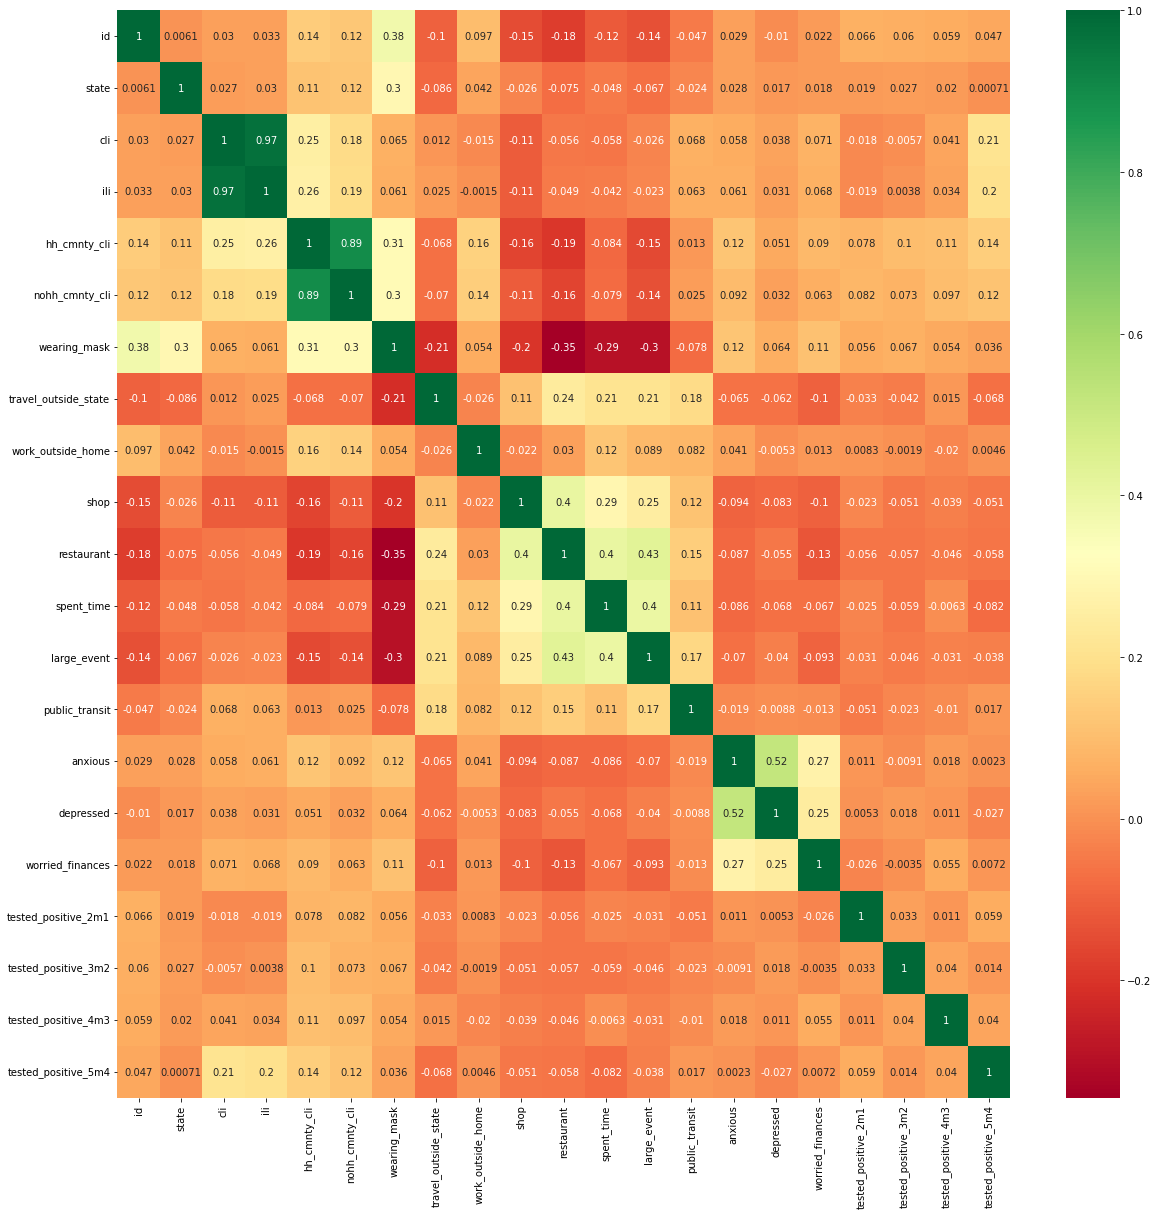

In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

df_viz = pd.read_csv("covid.train.new.csv")
# df_viz = df_viz.iloc[:, 1:]
# df_viz["tested_positive.1"] = df["tested_positive.1"] # df.iloc[:, -1]
# df_viz["tested_positive.2"] = df["tested_positive.2"] # df.iloc[:, -1]
# df_viz["tested_positive.3"] = df["tested_positive.3"] # df.iloc[:, -1]
# df_viz["tested_positive.4"] = df["tested_positive.4"] # df.iloc[:, -1]

# X = df.iloc[:,65:80]  #independent columns
# y = df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_viz.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_viz[top_corr_features].corr(),annot=True,cmap="RdYlGn")